In [2]:
import pandas as pd
import eurostat

# Import data using the Eurostat API
data = eurostat.get_data_df('TOUR_CE_OMN12')

#Drop columns'freq','unit'
data.drop(columns=['freq','unit'], errors='ignore', inplace=True)

#add column geo_layer to label geographic regions (NUTS codes).
df = pd.DataFrame(data)
df['geo_layer'] = df['geo\TIME_PERIOD'].apply(lambda x: 'NUT1' if len(x) == 3 else ('NUT2' if len(x) == 4 else ('Country' if len(x) == 2 else '[EU27_2020]')))
#put column "geo" besides column "geo_layer" 
col_order = ['geo\TIME_PERIOD', 'geo_layer'] + [col for col in df.columns if col not in ['geo\TIME_PERIOD', 'geo_layer']]
df = df[col_order]

#Drop row where 'c_resid' and 'month' value is total
df = df[df['c_resid'] != 'TOTAL']
df = df[df['month'] != 'TOTAL']

#Change colomn label for 'geo\TIME_PERIOD' to 'geo'
df.columns.values[df.columns.get_loc('geo\TIME_PERIOD')] = 'geo'

long_df = pd.melt(df, id_vars=['geo', 'geo_layer', 'indic_to', 'c_resid', 'month'], value_vars=['2018', '2019', '2020', '2021', '2022', '2023', '2024'], var_name='Year', value_name='Value') 



In [3]:
#check all parameter in dataset
import eurostat
pars = eurostat.get_pars('TOUR_CE_OMN12')
pars

['freq', 'indic_to', 'c_resid', 'month', 'unit', 'geo']

In [4]:
#check whether there's special character like space in the value of dataset

print("Unique values in 'indic_to' column:", data['indic_to'].unique())
print("Unique values in 'c_resid' column:", data['c_resid'].unique())
print("Unique values in 'month' column:", data['month'].unique())
print("Unique values in 'TIME_PERIOD' column:", data['geo\TIME_PERIOD'].unique())


Unique values in 'indic_to' column: ['LSTY' 'NGT_SP' 'STY']
Unique values in 'c_resid' column: ['DOM' 'FOR' 'TOTAL']
Unique values in 'month' column: ['M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10' 'M11' 'M12'
 'TOTAL']
Unique values in 'TIME_PERIOD' column: ['AT' 'AT1' 'AT11' 'AT12' 'AT13' 'AT2' 'AT21' 'AT22' 'AT3' 'AT31' 'AT32'
 'AT33' 'AT34' 'BE' 'BE1' 'BE10' 'BE2' 'BE21' 'BE22' 'BE23' 'BE24' 'BE25'
 'BE3' 'BE31' 'BE32' 'BE33' 'BE34' 'BE35' 'BG' 'BG3' 'BG31' 'BG32' 'BG33'
 'BG34' 'BG4' 'BG41' 'BG42' 'CH' 'CH0' 'CH01' 'CH02' 'CH03' 'CH04' 'CH05'
 'CH06' 'CH07' 'CY' 'CY0' 'CY00' 'CZ' 'CZ0' 'CZ01' 'CZ02' 'CZ03' 'CZ04'
 'CZ05' 'CZ06' 'CZ07' 'CZ08' 'DE' 'DE1' 'DE11' 'DE12' 'DE13' 'DE14' 'DE2'
 'DE21' 'DE22' 'DE23' 'DE24' 'DE25' 'DE26' 'DE27' 'DE3' 'DE30' 'DE4'
 'DE40' 'DE5' 'DE50' 'DE6' 'DE60' 'DE7' 'DE71' 'DE72' 'DE73' 'DE8' 'DE80'
 'DE9' 'DE91' 'DE92' 'DE93' 'DE94' 'DEA' 'DEA1' 'DEA2' 'DEA3' 'DEA4'
 'DEA5' 'DEB' 'DEB1' 'DEB2' 'DEB3' 'DEC' 'DEC0' 'DED' 'DED2' 'DED4' 'DED5'


In [5]:
#Check null value amount for each column
null_counts = long_df.isnull().sum()
print(null_counts)

geo              0
geo_layer        0
indic_to         0
c_resid          0
month            0
Year             0
Value        20886
dtype: int64


In [6]:
#Analyse null value distribution
#most of null value are in 2024,so we will not cover 2024 for later analyse
#For year 2018-2024,the null value amount is small, so we will drop it for later analyse

rows_2024 = long_df[long_df['Year'] == '2024']
rows_2023 = long_df[long_df['Year'] == '2023']
rows_2022 = long_df[long_df['Year'] == '2022']
rows_2021 = long_df[long_df['Year'] == '2021']
rows_2020 = long_df[long_df['Year'] == '2020']
rows_2019 = long_df[long_df['Year'] == '2019']
rows_2018 = long_df[long_df['Year'] == '2018']
missing_value_count_2024 = rows_2024['Value'].isna().sum()
missing_value_count_2023 = rows_2023['Value'].isna().sum()
missing_value_count_2022 = rows_2022['Value'].isna().sum()
missing_value_count_2021 = rows_2021['Value'].isna().sum()
missing_value_count_2020 = rows_2020['Value'].isna().sum()
missing_value_count_2019 = rows_2019['Value'].isna().sum()
missing_value_count_2018 = rows_2018['Value'].isna().sum()
print(f"Number of rows where Value is NaN for Year 2024: {missing_value_count_2024}")
print(f"Number of rows where Value is NaN for Year 2023: {missing_value_count_2023}")
print(f"Number of rows where Value is NaN for Year 2022: {missing_value_count_2022}")
print(f"Number of rows where Value is NaN for Year 2021: {missing_value_count_2021}")
print(f"Number of rows where Value is NaN for Year 2020: {missing_value_count_2020}")
print(f"Number of rows where Value is NaN for Year 2019: {missing_value_count_2019}")
print(f"Number of rows where Value is NaN for Year 2018: {missing_value_count_2018}")

Number of rows where Value is NaN for Year 2024: 20790
Number of rows where Value is NaN for Year 2023: 9
Number of rows where Value is NaN for Year 2022: 9
Number of rows where Value is NaN for Year 2021: 21
Number of rows where Value is NaN for Year 2020: 15
Number of rows where Value is NaN for Year 2019: 21
Number of rows where Value is NaN for Year 2018: 21


In [7]:
# Drop rows with any missing values
long_df.dropna(inplace=True)
# Drop rows where Year is 2024
long_df = long_df[long_df['Year'] != '2024']
long_df

,geo,geo_layer,indic_to,c_resid,month,Year,Value
0,AT,Country,LSTY,DOM,M01,2018,23783.0
1,AT1,NUT1,LSTY,DOM,M01,2018,8096.0
2,AT11,NUT2,LSTY,DOM,M01,2018,239.0
3,AT12,NUT2,LSTY,DOM,M01,2018,790.0
4,AT13,NUT2,LSTY,DOM,M01,2018,7067.0
...,...,...,...,...,...,...,...
166315,SK0,NUT1,STY,FOR,M12,2023,18620.0
166316,SK01,NUT2,STY,FOR,M12,2023,8896.0
166317,SK02,NUT2,STY,FOR,M12,2023,1296.0
166318,SK03,NUT2,STY,FOR,M12,2023,4891.0


In [8]:
#Summarize data by month, guest residence, or geo_layer
summary_df = long_df.groupby(['month', 'c_resid', 'indic_to', 'geo_layer','Year']).agg({
    'Value': 'sum',
}).reset_index()
#summary_file = 'processed_data.xlsx'
#summary_df.to_excel(summary_file, index=False)
summary_df

,month,c_resid,indic_to,geo_layer,Year,Value
0,M01,DOM,LSTY,Country,2018,2076982.0
1,M01,DOM,LSTY,Country,2019,2517764.0
2,M01,DOM,LSTY,Country,2020,3342210.0
3,M01,DOM,LSTY,Country,2021,2425589.0
4,M01,DOM,LSTY,Country,2022,4108208.0
...,...,...,...,...,...,...
1723,M12,FOR,STY,[EU27_2020],2019,1563624.0
1724,M12,FOR,STY,[EU27_2020],2020,171960.0
1725,M12,FOR,STY,[EU27_2020],2021,893514.0
1726,M12,FOR,STY,[EU27_2020],2022,1548701.0


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
# Function to preprocess data and train the model
def train_model(data):    
# Convert month to numerical format for modeling    
    data['month_num'] = data['month'].str.extract(r'M(\d+)').astype(int)    
# Select relevant features and target    
    X = data[['Year', 'month_num', 'geo_layer', 'indic_to', 'c_resid']].copy()    
    y = data['Value']    
# One-hot encode categorical variables    
    X = pd.get_dummies(X, columns=['geo_layer', 'indic_to', 'c_resid'], drop_first=True)    
# Split data into training and testing sets    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
# Train a Random Forest Regressor    
    model = RandomForestRegressor(n_estimators=100, random_state=42)    
    model.fit(X_train, y_train)    
# Evaluate the model    
    y_pred = model.predict(X_test)    
    mse = mean_squared_error(y_test, y_pred)    
    print(f"Model Mean Squared Error: {mse}")    
    return model, X 

In [44]:
import pandas as pd



# Sample holidays_df
holidays_data = {
    'holiday_date': pd.to_datetime(['2019-01-01', '2019-01-15', '2019-02-05', '2019-03-17', '2019-04-01']),
    'holiday_name': ['New Year', 'Festival A', 'Sport Event B', 'St. Patrick\'s Day', 'Easter']
}
holidays_df = pd.DataFrame(holidays_data)

# Create Year and formatted Month for holidays_df
holidays_df['Year'] = holidays_df['holiday_date'].dt.year
holidays_df['Month'] = holidays_df['holiday_date'].dt.month.astype(str).str.zfill(2)  # Ensure month is two digits

# Convert Year to integer in summary_df
summary_df['Year'] = summary_df['Year'].astype(int)  # Ensure Year is integer
summary_df['month'] = summary_df['month'].str[1:]  # Remove 'M' to match the two-digit format
summary_df['month'] = summary_df['month'].astype(str)  # Ensure month is still string

# Verify changes
print("Cleaned Summary DataFrame:")
print(summary_df)

# Merge summary_df with holidays_df
merged_df = summary_df.merge(
    holidays_df[['holiday_date', 'holiday_name', 'Year', 'Month']],
    left_on=['Year', 'month'], 
    right_on=['Year', 'Month'], 
    how='left'
)

# Create is_holiday column
merged_df['is_holiday'] = merged_df['holiday_name'].notnull().astype(int)

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)

Cleaned Summary DataFrame:
     month c_resid indic_to    geo_layer  Year      Value
0       01     DOM     LSTY      Country  2018  2076982.0
1       01     DOM     LSTY      Country  2019  2517764.0
2       01     DOM     LSTY      Country  2020  3342210.0
3       01     DOM     LSTY      Country  2021  2425589.0
4       01     DOM     LSTY      Country  2022  4108208.0
...    ...     ...      ...          ...   ...        ...
1723    12     FOR      STY  [EU27_2020]  2019  1563624.0
1724    12     FOR      STY  [EU27_2020]  2020   171960.0
1725    12     FOR      STY  [EU27_2020]  2021   893514.0
1726    12     FOR      STY  [EU27_2020]  2022  1548701.0
1727    12     FOR      STY  [EU27_2020]  2023  2006631.0

[1728 rows x 6 columns]

Merged DataFrame:
     month c_resid indic_to    geo_layer  Year      Value holiday_date  \
0       01     DOM     LSTY      Country  2018  2076982.0          NaT   
1       01     DOM     LSTY      Country  2019  2517764.0   2019-01-01   
2       01 

In [46]:
# Calculate average Value for holidays vs non-holidays
average_values = merged_df.groupby('is_holiday')['Value'].mean().reset_index()

# Rename columns for clarity
average_values.columns = ['is_holiday', 'average_value']

# Display the average values
print("Average Tourist Values:")
print(average_values)

Average Tourist Values:
   is_holiday  average_value
0           0   1.006345e+07
1           1   6.061690e+06


In [10]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import json

# Convert the month column to a category type and specify the order of the categories
month_order = [f"M{str(i).zfill(2)}" for i in range(1, 13)]
summary_df['month'] = pd.Categorical(summary_df['month'], categories=month_order, ordered=True)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Charts"),

    # Line chart controls
    html.H2("Line Chart Controls"),
    dcc.Dropdown(
        id='geo_layer-dropdown',
        options=[{'label': geo_layer, 'value': geo_layer} for geo_layer in summary_df['geo_layer'].unique()],
        value=summary_df['geo_layer'].unique()[0]
    ),
    dcc.Dropdown(
        id='indic_to-dropdown',
        options=[{'label': indic_to, 'value': indic_to} for indic_to in summary_df['indic_to'].unique()],
        value=summary_df['indic_to'].unique()[0]
    ),
    dcc.Dropdown(
        id='c_resid-dropdown',
        options=[{'label': 'All', 'value': 'All'}] + [{'label': c_resid, 'value': c_resid} for c_resid in summary_df['c_resid'].unique()],
        value='All'
    ),
    dcc.Graph(id='line-chart'),

    # Bar chart controls
    html.H2("Bar Chart Controls"),
    dcc.Dropdown(
        id='indic_to_filter',
        options=[{'label': indicator, 'value': indicator} for indicator in summary_df['indic_to'].unique()],
        value=summary_df['indic_to'].unique()[0],
        multi=False,
        placeholder="Select Indicator"
    ),
    dcc.Dropdown(
        id='year_filter',
        options=[{'label': year, 'value': year} for year in summary_df['Year'].unique()],
        value=summary_df['Year'].unique()[0],
        multi=False,
        placeholder="Select Year"
    ),
    dcc.Dropdown(
        id='geo_layer_filter',
        options=[{'label': geo, 'value': geo} for geo in summary_df['geo_layer'].unique()],
        value=summary_df['geo_layer'].unique()[0],
        multi=False,
        placeholder="Select Geographical Layer"
    ),
    dcc.Graph(id='bar_chart'),

    # New Pie Chart Controls
    html.H2("Pie Chart Controls"),
    dcc.Dropdown(
        id='pie_chart_indic_to',
        options=[{'label': indic_to, 'value': indic_to} for indic_to in summary_df['indic_to'].unique()],
        value=summary_df['indic_to'].unique()[0]
    ),
    dcc.Dropdown(
        id='pie_chart_geo_layer',
        options=[{'label': geo_layer, 'value': geo_layer} for geo_layer in summary_df['geo_layer'].unique()],
        value=summary_df['geo_layer'].unique()[0],
        multi=False,
        placeholder="Select Geographical Layer"
    ),
    dcc.Dropdown(
        id='pie_chart_year',
        options=[{'label': year, 'value': year} for year in summary_df['Year'].unique()],
        value=summary_df['Year'].unique()[0],
        multi=False,
        placeholder="Select Year"
    ),
    dcc.Dropdown(
        id='pie_chart_month',
        options=[{'label': month, 'value': month} for month in summary_df['month'].unique()],
        value=summary_df['month'].unique()[0],
        multi=False,
        placeholder="Select Month"
    ),
    dcc.Graph(id='pie_chart'),# New graph for the pie chart

    # 新增热图控件
    html.H2("Geographical Heatmap Controls"),
    dcc.Dropdown(
        id='heatmap_indic_to',
        options=[{'label': indic_to, 'value': indic_to} for indic_to in long_df['indic_to'].unique()],
        value=long_df['indic_to'].unique()[0],
        multi=False,
        placeholder="Select Indicator"
    ),
    dcc.Dropdown(
        id='heatmap_year',
        options=[{'label': year, 'value': year} for year in long_df['Year'].unique()],
        value=long_df['Year'].unique()[0],
        multi=False,
        placeholder="Select Year"
    ),
    dcc.Dropdown(
        id='heatmap_c_resid',
        options=[{'label': c_resid, 'value': c_resid} for c_resid in long_df['c_resid'].unique()],
        value=long_df['c_resid'].unique()[0],
        multi=False,
        placeholder="Select Residency"
    ),
    dcc.Dropdown(
        id='heatmap_month',
        options=[{'label': month, 'value': month} for month in long_df['month'].unique()],
        value=long_df['month'].unique()[0],
        multi=False,
        placeholder="Select Month"
    ),
    dcc.Dropdown(
        id='heatmap_geo_layer',
        options=[{'label': geo_layer, 'value': geo_layer} for geo_layer in long_df['geo_layer'].unique()],
        value=long_df['geo_layer'].unique()[0],
        multi=False,
        placeholder="Select geo_layer"
    ),    
    dcc.Graph(id='geo_heatmap'),  # 用于展示热图的组件
    # Add Top 10 Controls
    html.H2("Top 10 Popular Tourist Destinations"),
    dcc.Dropdown(
        id='top10_geo_layer',
        options=[{'label': geo_layer, 'value': geo_layer} for geo_layer in long_df['geo_layer'].unique()],
        value=long_df['geo_layer'].unique()[0],
        multi=False,
        placeholder="Select Geographical Layer"
    ),
    dcc.Dropdown(
        id='top10_year',
        options=[{'label': year, 'value': year} for year in long_df['Year'].unique()],
        value=long_df['Year'].unique()[0],
        multi=False,
        placeholder="Select Year"
    ),
    dcc.Dropdown(
        id='top10_c_resid',
        options=[{'label': c_resid, 'value': c_resid} for c_resid in long_df['c_resid'].unique()],
        value=long_df['c_resid'].unique()[0],
        multi=False,
        placeholder="Select Residency"
    ),
    dcc.Dropdown(
        id='top10_month',
        options=[{'label': month, 'value': month} for month in long_df['month'].unique()],
        value=long_df['month'].unique()[0],
        multi=False,
        placeholder="Select Month"
    ),
    dcc.Graph(id='top10_chart'),  # Graph for Top 10 Popular Tourist Destinations
    # Animated Chart Controls
    html.H2("Animated Change Over Time"),
    dcc.Dropdown(
        id='anim_geo_layer',
        options=[{'label': geo_layer, 'value': geo_layer} for geo_layer in long_df['geo_layer'].unique()],
        value=long_df['geo_layer'].unique()[0],
        multi=False,
        placeholder="Select Geographical Layer"
    ),
    dcc.Dropdown(
        id='anim_indic_to',
        options=[{'label': indic_to, 'value': indic_to} for indic_to in long_df['indic_to'].unique()],
        value=long_df['indic_to'].unique()[0],
        multi=False,
        placeholder="Select Indicator"
    ),
    dcc.Graph(id='animated_chart'),  # Graph for animated changes over time
])
@app.callback(
    Output('line-chart', 'figure'),
    [Input('geo_layer-dropdown', 'value'),
     Input('indic_to-dropdown', 'value'),
     Input('c_resid-dropdown', 'value')]
)
def update_line_chart(selected_geo_layer, selected_indic_to, selected_c_resid):
    if selected_c_resid == 'All':
        filtered_df = summary_df[
            (summary_df['geo_layer'] == selected_geo_layer) &
            (summary_df['indic_to'] == selected_indic_to)
        ].groupby(['month', 'Year']).sum().reset_index()
    else:
        filtered_df = summary_df[
            (summary_df['geo_layer'] == selected_geo_layer) &
            (summary_df['indic_to'] == selected_indic_to) &
            (summary_df['c_resid'] == selected_c_resid)
        ]
    
    fig = px.line(
        filtered_df, x='month', y='Value', color='Year', 
        title=f"Line Chart for {selected_geo_layer}, {selected_indic_to}, {selected_c_resid}"
    )
    return fig

@app.callback(
    Output('bar_chart', 'figure'),
    Input('indic_to_filter', 'value'),
    Input('year_filter', 'value'),
    Input('geo_layer_filter', 'value')
)
def update_bar_chart(selected_indicator, selected_year, selected_geo_layer):
    filtered_df = summary_df[
        (summary_df['indic_to'] == selected_indicator) &
        (summary_df['Year'] == selected_year) &
        (summary_df['geo_layer'] == selected_geo_layer)
    ].copy()

    total_value = filtered_df['Value'].sum()
    filtered_df['Percentage'] = (filtered_df['Value'] / total_value * 100).round(2).astype(str) + '%'


        # 创建条形图，使用 c_resid 作为颜色分类
    fig = px.bar(
        filtered_df,
        x='month',
        y='Value',
        color='c_resid',
        title='Interactive Bar Chart by Month',
        text='Percentage'  # 在条形上显示百分比
    )

    # 更新数据标签的显示设置
    fig.update_traces(textposition='outside', textfont=dict(size=12))
    
    return fig

@app.callback(
    Output('pie_chart', 'figure'),
    [Input('pie_chart_indic_to', 'value'),
     Input('pie_chart_geo_layer', 'value'),
     Input('pie_chart_year', 'value'),
     Input('pie_chart_month', 'value')]
)
def update_pie_chart(selected_indicator, selected_geo_layer, selected_year, selected_month):
    # 数据过滤
    filtered_df = summary_df[
        (summary_df['indic_to'] == selected_indicator) &
        (summary_df['geo_layer'] == selected_geo_layer) &
        (summary_df['Year'] == selected_year) &
        (summary_df['month'] == selected_month)
    ].copy()

    # 创建饼图
    pie_fig = px.pie(
        filtered_df,
        names='c_resid',
        values='Value',
        title=f'Pie Chart for {selected_indicator} - {selected_geo_layer} - {selected_year} - {selected_month}'
    )
    return pie_fig

# 加载 GeoJSON 文件
with open('/Users/mac/NUTS_RG_60M_2024_4326.geojson') as f:
    nuts_geojson = json.load(f)
@app.callback(
    Output('geo_heatmap', 'figure'),
    [Input('heatmap_indic_to', 'value'),
     Input('heatmap_year', 'value'),
     Input('heatmap_c_resid', 'value'),
     Input('heatmap_month', 'value'),
    Input('heatmap_geo_layer', 'value')]
)
def update_geo_heatmap(selected_indicator, selected_year, selected_c_resid, selected_month,selected_geo_layer):
    # 数据过滤
    filtered_heatmap_df = long_df[
        (long_df['indic_to'] == selected_indicator) &
        (long_df['Year'] == selected_year) &
        (long_df['c_resid'] == selected_c_resid) &
        (long_df['month'] == selected_month)&
        (long_df['geo_layer'] == selected_geo_layer)
    ].copy()
    #print(filtered_heatmap_df)
    # 如果没有数据，则可以返回空图或提示
    if filtered_heatmap_df.empty:
        return px.choropleth()  # 你可以插入一个空图，或创建一个文字标记未找到数据
    # 根据 geo layer 确定 locationmode
    #if selected_geo_layer == 'Country':
        #locationmode = 'country names'  # 使用国家名称
    #elif selected_geo_layer == 'NUT1':
        #locationmode = 'NUTS-1'  # 使用 NUTS-1 代码
    #elif selected_geo_layer == 'NUT2':
        #locationmode = 'NUTS-2'  # 使用 NUTS-2 代码
    #else:
        #locationmode = 'country names'  # 默认用国家名称
    # 创建热图
    fig = px.choropleth(
        filtered_heatmap_df,
        geojson=nuts_geojson,
        locations='geo',  # 地理标识符，确保这个与Plotly支持的地区一致
        featureidkey='properties.NUTS_ID',
        color='Value',  # 绘制的值
        hover_name='geo',  # 鼠标悬停时显示的信息
        title=f'Geographical Heatmap for {selected_indicator} in {selected_year}, {selected_c_resid}, {selected_month}, {selected_geo_layer}',
        color_continuous_scale=px.colors.sequential.Plasma  # 选择配色方案
    )
    return fig
# Add callback for Top 10 chart
@app.callback(
    Output('top10_chart', 'figure'),
    [Input('top10_geo_layer', 'value'),
     Input('top10_year', 'value'),
     Input('top10_c_resid', 'value'),
     Input('top10_month', 'value')]
)
def update_top10_chart(selected_geo_layer, selected_year, selected_c_resid, selected_month):
    filtered_top10_df = long_df[
        (long_df['geo_layer'] == selected_geo_layer) &
        (long_df['Year'] == selected_year) &
        (long_df['c_resid'] == selected_c_resid) &
        (long_df['month'] == selected_month)
    ]

    # Group and sum values for each geographical code
    top10 = filtered_top10_df.groupby('geo')['Value'].sum().reset_index()

    # Sort by Value and select top 10
    top10 = top10.sort_values(by='Value', ascending=False).head(10)

    # Create bar chart for top 10 destinations
    fig = px.bar(
        top10,
        x='Value',
        y='geo',
        title=f'Top 10 Tourist Destinations for {selected_geo_layer} in {selected_year}, {selected_c_resid}, {selected_month}',
        labels={'geo': 'Country/NUTS Code', 'Value': 'Total Number'},
        orientation='h'
    )

    return fig


@app.callback(
    Output('animated_chart', 'figure'),
    [Input('anim_geo_layer', 'value'),
     Input('anim_indic_to', 'value')]
)
def update_animated_chart(selected_geo_layer, selected_indicator):
    filtered_anim_df = long_df[
        (long_df['geo_layer'] == selected_geo_layer) &
        (long_df['indic_to'] == selected_indicator)
    ]

    # Aggregate monthly values by Year and c_resid
    monthly_sum = filtered_anim_df.groupby(['Year', 'month', 'c_resid'])['Value'].sum().reset_index()

    # Create an 'All' row by summing FOR and DOM
    all_sum = monthly_sum.groupby(['Year', 'month'])['Value'].sum().reset_index()
    all_sum['c_resid'] = 'All'  # Tag all categories as 'All'

    # Combine the data back to include FOR, DOM, and All
    combined_data = pd.concat([monthly_sum, all_sum], ignore_index=True)

    # Create the animated line chart
    fig = px.line(
        combined_data,
        x='Year',  # x-axis as Year
        y='Value',  # y-axis as aggregated monthly values
        animation_frame='month',  # Use month for animation
        color='c_resid',  # Color by residency category which includes 'All'
        title=f'Monthly Value Sum Over Years for {selected_geo_layer} - {selected_indicator}',
        labels={'Value': 'Total Numbers', 'Year': 'Year'},
        range_y=[0, combined_data['Value'].max() * 1.1]  # Adjust y-axis range for better visibility
    )

    return fig

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
# Function to preprocess data and train the model
def train_model(data):    
# Convert month to numerical format for modeling    
    data['month_num'] = data['month'].str.extract(r'M(\d+)').astype(int)    
# Select relevant features and target    
    X = data[['Year', 'month_num', 'geo_layer', 'indic_to', 'c_resid']].copy()    
    y = data['Value']    
# One-hot encode categorical variables    
    X = pd.get_dummies(X, columns=['geo_layer', 'indic_to', 'c_resid'], drop_first=True)    
# Split data into training and testing sets    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
# Train a Random Forest Regressor    
    model = RandomForestRegressor(n_estimators=100, random_state=42)    
    model.fit(X_train, y_train)    
# Evaluate the model    
    y_pred = model.predict(X_test)    
    mse = mean_squared_error(y_test, y_pred)    
    print(f"Model Mean Squared Error: {mse}")    
    return model, X 
# Function to predict future trends
def predict_future_trends(model, historical_data, years_to_predict=3):    
    # Create a DataFrame for future predictions    
    last_year = historical_data['Year'].max()    
    future_years = list(range(last_year + 1, last_year + 1 + years_to_predict))    
    # Generate rows for each combination of future year and month    
    future_data = pd.DataFrame([(year, month) for year in future_years for month in range(1, 13)],                               
                               columns=['Year', 'month_num'])    
    # Add placeholders for categorical features    
    future_data['geo_layer'] = historical_data['geo_layer'].iloc[0]    
    future_data['indic_to'] = historical_data['indic_to'].iloc[0]    
    future_data['c_resid'] = historical_data['c_resid'].iloc[0]    
    # One-hot encode future data    
    future_data = pd.get_dummies(future_data, columns=['geo_layer', 'indic_to', 'c_resid'], drop_first=True)    
    # Align columns with training data    
    for col in model.feature_names_in_:        
        if col not in future_data.columns:            
            future_data[col] = 0    
            # Predict future trends    
            future_data['Predicted_Value'] = model.predict(future_data)    
            return future_data 
        
@app.callback(    
    Output('prediction_chart', 'figure'),    
    [Input('geo_layer-dropdown', 'value'),     
     Input('indic_to-dropdown', 'value'),     
     Input('c_resid-dropdown', 'value')])
def update_prediction_chart(selected_geo_layer, selected_indic_to, selected_c_resid):    
    # Filter data for training    
    filtered_df = summary_df[
        (summary_df['geo_layer'] == selected_geo_layer) &
        (summary_df['indic_to'] == selected_indic_to) &
        (summary_df['c_resid'] == selected_c_resid)
    ].copy()    
    # Train the model    
    model, historical_features = train_model(filtered_df)    
    # Predict future trends    
    future_predictions = predict_future_trends(model, filtered_df)    
    # Combine historical data with predictions    
    historical_data = filtered_df[['Year', 'month', 'Value']]    
    historical_data['Type'] = 'Historical'    
    future_predictions['month'] = future_predictions['month_num'].apply(lambda x: f"M{x:02}")    
    future_predictions = future_predictions.rename(columns={'Predicted_Value': 'Value'})    
    future_predictions['Type'] = 'Predicted'    
    combined_data = pd.concat([historical_data, future_predictions], ignore_index=True)    
    # Create a line chart    
    fig = px.line(        
        combined_data,        
        x='month',        
        y='Value',        
        color='Type',        
        line_group='Year',        
        title=f"Predicted Trends for {selected_geo_layer}, {selected_indic_to}, {selected_c_resid}",        
        labels=
        {'Value': 'Accommodation Demand'}
    )    
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

OSError: [Errno 48] Address already in use

In [47]:
from scipy import stats

# Separate the values into two groups
holiday_values = merged_df[merged_df['is_holiday'] == 1]['Value']
non_holiday_values = merged_df[merged_df['is_holiday'] == 0]['Value']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(holiday_values, non_holiday_values, equal_var=False)

# Display t-test results
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

T-test results: t-statistic = -6.550844631400255, p-value = 4.110507669887918e-10


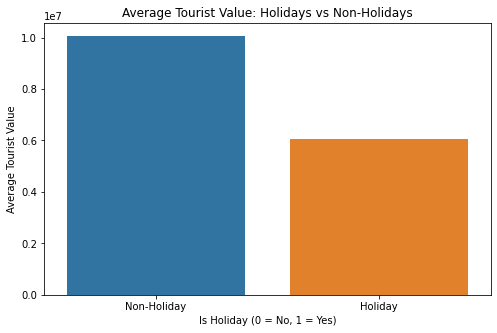

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to visualize the average values for holidays vs non-holidays
plt.figure(figsize=(8, 5))
sns.barplot(x='is_holiday', y='average_value', data=average_values)
plt.title('Average Tourist Value: Holidays vs Non-Holidays')
plt.xlabel('Is Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Tourist Value')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()